In [28]:
import pandas as pd
import numpy as np
import random
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA

In [2]:
# Data Loading
photos_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/photos.csv', sep=',', encoding='latin-1',low_memory=False)
ratings_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/ratings.csv', sep=',', encoding='latin-1',low_memory=False)
surveys_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/surveys.csv', sep=',', encoding='latin-1',low_memory=False)
annotations_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/annotations.csv', sep=',', encoding='latin-1',low_memory=False)

In [4]:
#Go fetch the train and test
testset = pd.read_csv('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/csvs/testset.csv')
trainset = pd.read_csv('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/csvs/trainset.csv')

# Converter de volta para lista de tuplas
testset = [tuple(row) for row in testset.to_numpy()]
trainset = [tuple(row) for row in trainset.to_numpy()]

# Exibir os dados carregados
print(testset)
print(trainset)

[(1, 1738, 1), (1, 318, 0), (1, 1055, 1), (2, 40, 1), (2, 1898, 0), (2, 544, 1), (3, 675, 1), (3, 235, 0), (3, 1295, 1), (4, 2901, 1), (4, 1250, 0), (4, 1082, 1), (5, 1717, 1), (5, 2717, 1), (5, 2897, 1), (6, 1251, 1), (6, 2143, 1), (6, 546, 1), (7, 429, 1), (7, 2877, 0), (7, 2195, 1), (8, 38, 1), (8, 2516, 0), (8, 1925, 0), (9, 1839, 1), (9, 2677, 0), (9, 1543, 1), (10, 2738, 1), (10, 3059, 0), (10, 2892, 1), (11, 1255, 1), (11, 2002, 0), (11, 1612, 0), (12, 1235, 1), (12, 2876, 0), (12, 2099, 1), (13, 2474, 1), (13, 2684, 0), (13, 155, 0), (14, 2533, 1), (14, 857, 0), (14, 2736, 0), (15, 1312, 1), (15, 2390, 0), (15, 407, 1), (16, 215, 1), (16, 1335, 0), (16, 205, 1), (17, 530, 1), (17, 3057, 0), (17, 791, 1), (18, 1737, 1), (18, 954, 0), (18, 1156, 1), (19, 980, 1), (19, 98, 1), (19, 3004, 1), (20, 1429, 1), (20, 1861, 0), (20, 567, 1), (21, 584, 1), (21, 853, 0), (21, 2792, 1), (22, 1428, 1), (22, 365, 0), (22, 724, 1), (23, 634, 1), (23, 534, 0), (23, 1315, 1), (24, 1683, 1), (24,

In [29]:
df_random_items_per_user = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/random_items_per_user.json')
json_path = 'C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/random_items_per_user.json'
with open(json_path, 'r') as file:
    random_items_dict = json.load(file)

random_items_dict = {int(key): value for key, value in random_items_dict.items()}
random_items_dict

{1: [599,
  748,
  208,
  1725,
  6,
  1327,
  474,
  2811,
  2184,
  1335,
  3041,
  2691,
  2030,
  2211,
  80,
  38,
  3016,
  1315,
  1415,
  530],
 2: [1038,
  1922,
  2303,
  689,
  2998,
  1521,
  559,
  1548,
  2095,
  414,
  2143,
  2661,
  1427,
  2811,
  1818,
  2,
  925,
  2516,
  2533,
  316],
 3: [2920,
  1665,
  3009,
  2695,
  99,
  2288,
  2796,
  2787,
  736,
  2306,
  1388,
  2630,
  208,
  2668,
  767,
  480,
  1362,
  14,
  2723,
  364],
 4: [2556,
  1586,
  453,
  1300,
  1821,
  2673,
  1550,
  2481,
  400,
  1946,
  2654,
  2502,
  1645,
  857,
  689,
  2014,
  2234,
  864,
  2995,
  1044],
 5: [953,
  2206,
  887,
  544,
  2211,
  2951,
  2447,
  2,
  530,
  278,
  123,
  996,
  2894,
  1642,
  2691,
  155,
  861,
  1979,
  2957,
  2581],
 6: [2447,
  3032,
  2882,
  2745,
  2848,
  1415,
  2258,
  1487,
  155,
  615,
  166,
  2457,
  2405,
  2046,
  1502,
  559,
  1302,
  2895,
  1201,
  1300],
 7: [2396,
  2621,
  1821,
  2552,
  1327,
  993,
  1940,
  969,
 

In [17]:
df_embeddings_vgg16 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_vgg16.json',orient='records', lines=True)
df_embeddings_vgg19 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_vgg19.json',orient='records', lines=True)
df_embeddings_resnet50 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet50.json', orient='records', lines=True)
df_embeddings_resnet50v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet50v2.json', orient='records', lines=True)
df_embeddings_resnet101 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet101.json', orient='records', lines=True)
df_embeddings_resnet101v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet101v2.json', orient='records', lines=True)
df_embeddings_resnet152 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet152v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet152v2.json', orient='records', lines=True)
df_embeddings_inceptionv3 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_incepitonv3.json', orient='records', lines=True)
df_embeddings_xception = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_xception.json', orient='records', lines=True)

In [19]:
embeddings_list_vgg16 = df_embeddings_vgg16['embedding'].tolist()
embeddings_list_vgg19 = df_embeddings_vgg19['embedding'].tolist()
embeddings_list_restnet50 = df_embeddings_resnet50['embedding'].tolist()
embeddings_list_restnet50v2 = df_embeddings_resnet50v2['embedding'].tolist()
embeddings_list_restnet101 = df_embeddings_resnet101['embedding'].tolist()
embeddings_list_restnet101v2 = df_embeddings_resnet101v2['embedding'].tolist()
embeddings_list_restnet152 = df_embeddings_resnet152['embedding'].tolist()
embeddings_list_restnet152v2 = df_embeddings_resnet152v2['embedding'].tolist()
embeddings_list_inceptionv3 = df_embeddings_inceptionv3['embedding'].tolist()
embeddings_list_xception = df_embeddings_xception['embedding'].tolist()

# Crie um DataFrame onde cada vetor de embedding é uma lista em uma única coluna
df_embeddings_vgg16_1 = pd.DataFrame({'embedding': embeddings_list_vgg16})
df_embeddings_vgg19_1 = pd.DataFrame({'embedding': embeddings_list_vgg19})
df_embeddings_resnet50_1 = pd.DataFrame({'embedding': embeddings_list_restnet50})
df_embeddings_resnet50v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet50v2})
df_embeddings_resnet101_1 = pd.DataFrame({'embedding': embeddings_list_restnet101})
df_embeddings_resnet101v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet101v2})
df_embeddings_resnet152_1 = pd.DataFrame({'embedding': embeddings_list_restnet152})
df_embeddings_resnet152v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet152v2})
df_embeddings_inceptionv3_1 = pd.DataFrame({'embedding': embeddings_list_inceptionv3})
df_embeddings_xception_1 = pd.DataFrame({'embedding': embeddings_list_xception})


df_embeddings_vgg16_1['id'] = df_embeddings_vgg16['id'].values
df_embeddings_vgg19_1['id'] = df_embeddings_vgg19['id'].values
df_embeddings_resnet50_1['id'] = df_embeddings_resnet50['id'].values
df_embeddings_resnet50v2_1['id'] = df_embeddings_resnet50v2['id'].values
df_embeddings_resnet101_1['id'] = df_embeddings_resnet101['id'].values
df_embeddings_resnet101v2_1['id'] = df_embeddings_resnet101v2['id'].values
df_embeddings_resnet152_1['id'] = df_embeddings_resnet152['id'].values
df_embeddings_resnet152v2_1['id'] = df_embeddings_resnet152v2['id'].values
df_embeddings_inceptionv3_1['id'] = df_embeddings_inceptionv3['id'].values
df_embeddings_xception_1['id'] = df_embeddings_xception['id'].values

# Verifique o resultado
print(df_embeddings_vgg16_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_vgg16_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_vgg19_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_vgg19_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet50_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet50v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_inceptionv3_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_inceptionv3_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_xception_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_xception_1.head())  # Mostra as primeiras linhas do DataFrame

type(df_embeddings_resnet50_1['embedding'][0])
type(df_embeddings_resnet50v2_1['embedding'][0])
type(df_embeddings_resnet101_1['embedding'][0])
type(df_embeddings_resnet101v2_1['embedding'][0])
type(df_embeddings_resnet152_1['embedding'][0])
type(df_embeddings_resnet152v2_1['embedding'][0])
type(df_embeddings_inceptionv3_1['embedding'][0])
type(df_embeddings_xception_1['embedding'][0])

(2885, 2)
                                           embedding   id
0  [[0.0, 25.103931427, 34.5760383606, 0.0, 13.10...  492
1  [[0.0, 14.7611036301, 2.9091243744, 8.95020675...  496
2  [[82.2871780396, 26.518907547, 89.4835128784, ...    1
3  [[25.3831501007, 0.0, 87.2220230103, 0.0, 28.6...    2
4  [[0.3590965271, 14.3963012695, 78.7917785645, ...    3
(2885, 2)
                                           embedding   id
0  [[30.9996681213, 0.0, 13.3653011322, 0.0, 20.3...  492
1  [[30.7576274872, 24.7594871521, 0.0, 0.0, 58.7...  496
2  [[62.916015625, 17.9737758636, 49.7146720886, ...    1
3  [[45.7393226624, 0.0, 117.1519012451, 0.0, 13....    2
4  [[11.1067037582, 51.9066696167, 15.1681070328,...    3
(2885, 2)
                                           embedding   id
0  [[10.9118013382, 0.0, 1.9094718695, 1.39259040...  492
1  [[2.4981195927, 2.0137376785, 0.20146203040000...  496
2  [[4.3851785660000004, 1.5552761555, 0.0, 3.049...    1
3  [[3.6507296562000002, 5.4972262383, 1.5

list

In [20]:
def evaluate_metrics(recommendations, testset, ks):
    """
    Calculates precision, recall, and F1-score for different values of k, based on the recommendations and the test set.

    Args:
        recommendations (dict): A dictionary where keys are user IDs and values are lists of recommended item IDs.
        testset (Dataset): The test dataset containing user-item interactions with ratings.
        ks (list): A list of integer values for k, representing the number of top recommendations to evaluate.

    Returns:
        tuple: Three dictionaries (precisions, recalls, f1_scores) where each key is a value of k and the values are dictionaries mapping user IDs to their respective precision, recall, and F1-score for that k.
    """

    relevant_items_dict = {}
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])
    for user in test_df['uid'].unique():
        user_test_df = test_df[test_df['uid'] == user]
        relevant_items = set(user_test_df[user_test_df['rating'] > 0]['iid'])
        relevant_items_dict[user] = relevant_items

    precisions = {k: {} for k in ks}
    recalls = {k: {} for k in ks}
    f1_scores = {k: {} for k in ks}

    for user, relevant_items in relevant_items_dict.items():
        relevant_set = set(relevant_items)
        # print('relevant_set')
        # print(relevant_set)
        for k in ks:
            top_k_recommendations = set(recommendations[user][:k])
            relevant_and_recommended = top_k_recommendations & relevant_set #Interseption between the recommended and relevant
            # print('relevant_and_recommended')
            # print(relevant_and_recommended)
            rel_rec = len(relevant_and_recommended)
            precision = rel_rec / k if k > 0 else 0.0
            recall = rel_rec / len(relevant_set) if relevant_set else 0.0
            f1score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

            precisions[k][user] = precision
            recalls[k][user] = recall
            f1_scores[k][user] = f1score

    return precisions, recalls, f1_scores

def evaluate_metrics_avg(precisions, recalls, f1scores):
    """Calculates the average precision, recall, an f1-score for different values of k,
    based on the precision, recall, and f1-score metrics calculated for each user

    Args:
        precisions (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their precision score
        recalls (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their recall score
        f1scores (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their f1-score score

    Returns:
        tuple: containing three dicts:
        
        -avg_precisions: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average precision scores
        -avg_recalls: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average recall scores
        -avg_f1-scores: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average f1-scores
    """

    avg_precisions = {k: round(sum(precisions[k].values()) / len(precisions[k]), 4) for k in precisions}
    avg_recalls = {k: round(sum(recalls[k].values()) / len(recalls[k]), 4) for k in recalls}
    avg_f1scores = {k: round(sum(f1scores[k].values()) / len(f1scores[k]), 4) for k in f1scores}

    # print(avg_precisions)
    return avg_precisions, avg_recalls, avg_f1scores

In [21]:
def similar_items(item_to_recommend, user_profile_items, similarity_matrix_df, n=2):
    train_items_scores = similarity_matrix_df.loc[item_to_recommend, similarity_matrix_df.columns.isin(user_profile_items)]

    tuples_ids_score = list(zip(train_items_scores.index, train_items_scores.values))
    tuples_ids_score.sort(key=lambda x: x[1], reverse=True)
    item_ids = [item for item, _ in tuples_ids_score]
    # return item_ids[:n]
    return tuples_ids_score[:n] ,item_ids[:n]

In [22]:
def compute_cosine_similarity_matrix_by_user(df_embeddings):

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)
    similarity_matrix = cosine_similarity(pixels_vec)
    # print(pixels_vec)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

        
    return similarity_df

def compute_euclidean_similarity_matrix_by_user(df_embeddings):

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)

    pixels_vec_normalized = normalize(pixels_vec, norm='l2')

    similarity_matrix = euclidean_distances(pixels_vec_normalized)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

    return similarity_df

In [23]:
def recommend_items_by_user_cos(trainset, testset, df_embeddings, n, metric, random_items_dict):
    """Generates item recommendations for users based on cosine similarity between item embeddings.

    Args:
        trainset (list of tuples): List of training interactions in the format (user_id, item_id, rating).
        testset (list of tuples): List of test interactions in the format (user_id, item_id, rating).
        df_embeddings (pd.Dataframe): DataFrame containing embeddings and associated IDs for items. Must have an 'embedding' column 
        with list or array-like vectors and an 'id' column with unique identifiers for each item.
        n (int): The number of similar items to consider when computing recommendations for each item.

    Returns:
        dict: Dictionary with user IDs as keys and lists of recommended item IDs as values.
        Each list contains the top 10 recommended items for the corresponding user, sorted by predicted relevance.
    """

    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_cosine_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        # available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do 
        # random_items = random.sample(available_items, 20)
        random_items = random_items_dict[user]

        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, item_sim_tuple[0][1]))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, item_sim_tuple[0][1]))

        # Metric 2
        if metric == 2:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value, item_random_sim[0][1]))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,  item_random_sim[0][1]))

        # Metric 3
        if metric == 3:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + (sim_score**2)
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value,item_random_sim[0][1]))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + sim_score**2
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,item_random_sim[0][1]))

            
        # print(items_to_recommend)
        items_to_recommend = sorted(items_to_recommend, key=lambda x: (x[1], x[2]), reverse=True)  
        # print(items_to_recommend)
        # items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend[:10])
        items_to_recommend_ids = [item for item, _, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]

    return recommendations

def recommend_items_by_user_eucl(trainset, testset, df_embeddings, n,metric, random_items_dict):
    """Generates item recommendations for users based on euclidean similarity between item embeddings.

    Args:
        trainset (list of tuples): List of training interactions in the format (user_id, item_id, rating).
        testset (list of tuples): List of test interactions in the format (user_id, item_id, rating).
        df_embeddings (pd.Dataframe): DataFrame containing embeddings and associated IDs for items. Must have an 'embedding' column 
        with list or array-like vectors and an 'id' column with unique identifiers for each item.
        n (int): The number of similar items to consider when computing recommendations for each item.

    Returns:
        dict: Dictionary with user IDs as keys and lists of recommended item IDs as values.
        Each list contains the top 10 recommended items for the corresponding user, sorted by predicted relevance.
    """
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_euclidean_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        # available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do treino
        # random_items = random.sample(available_items, 20)
        random_items = random_items_dict[user]

        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, item_sim_tuple[0][1]))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, item_sim_tuple[0][1]))

        # Metric 2
        if metric == 2:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value, item_random_sim[0][1]))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,  item_random_sim[0][1]))

        # Metric 3
        if metric == 3:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + (sim_score**2)
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value,item_random_sim[0][1]))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + sim_score**2
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,item_random_sim[0][1]))

            
        # print(items_to_recommend)
        items_to_recommend = sorted(items_to_recommend, key=lambda x: (x[1], x[2]), reverse=True)  
        items_to_recommend_ids = [item for item, _,_ in items_to_recommend]
        recommendations[user] = items_to_recommend_ids[:10]
        # break

    return recommendations
     

In [24]:
embedding_matrix_vgg16 = np.vstack(df_embeddings_vgg16_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_vgg19 = np.vstack(df_embeddings_vgg19_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet50 = np.vstack(df_embeddings_resnet50_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet50v2 = np.vstack(df_embeddings_resnet50v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet101 = np.vstack(df_embeddings_resnet101_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet101v2 = np.vstack(df_embeddings_resnet101v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet152 = np.vstack(df_embeddings_resnet152_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet152v2 = np.vstack(df_embeddings_resnet152v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_inceptionv3 = np.vstack(df_embeddings_inceptionv3_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_xception = np.vstack(df_embeddings_xception_1['embedding'].apply(lambda x: np.array(x).flatten()))

## PCA vgg16

Number of components explaining 95% variance: 274


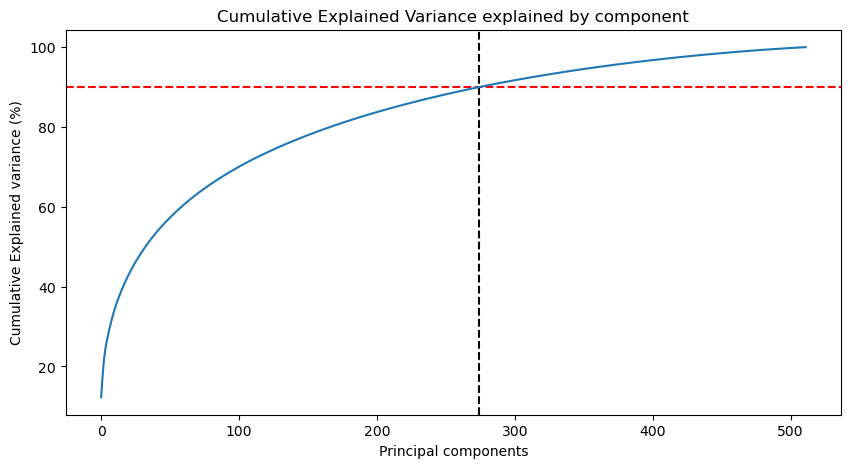

In [25]:
pca = PCA()
pca.fit(embedding_matrix_vgg16)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_vgg16 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_vgg16))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_vgg16, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [26]:
pca_vgg16 = PCA(n_components=274)
embedding_matrix_pcavgg16 = pca_vgg16.fit_transform(embedding_matrix_vgg16)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_vgg16_pca = pd.DataFrame({
    'id': df_embeddings_vgg16_1['id'],
    'embedding': embedding_matrix_pcavgg16.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_vgg16_pca.head())

    id                                          embedding
0  492  [-210.0150561003347, 40.05785935912774, -75.93...
1  496  [-232.90309610151328, 112.97455258553542, -104...
2    1  [273.26888119934205, 201.8679815851644, -233.1...
3    2  [62.21044613755589, 176.12673610724332, -78.06...
4    3  [24.507685783303092, 102.84983578172628, -134....


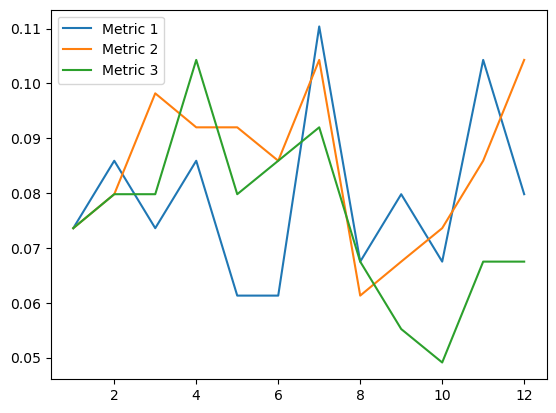

In [30]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [14]:
rec_cos_vgg16_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16_pca, n=3)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0736  Average Recall: 0.0389  Average F1-score: 0.0501
k=2:  Average Precision: 0.0798  Average Recall: 0.0859  Average F1-score: 0.0810
k=3:  Average Precision: 0.0736  Average Recall: 0.1176  Average F1-score: 0.0888
k=4:  Average Precision: 0.0752  Average Recall: 0.1595  Average F1-score: 0.1005
k=5:  Average Precision: 0.0810  Average Recall: 0.2117  Average F1-score: 0.1155
k=6:  Average Precision: 0.0787  Average Recall: 0.2485  Average F1-score: 0.1178
k=7:  Average Precision: 0.0762  Average Recall: 0.2781  Average F1-score: 0.1182
k=8:  Average Precision: 0.0752  Average Recall: 0.3190  Average F1-score: 0.1201
k=9:  Average Precision: 0.0763  Average Recall: 0.3630  Average F1-score: 0.1247
k=10:  Average Precision: 0.0742  Average Recall: 0.3988  Average F1-score: 0.1237


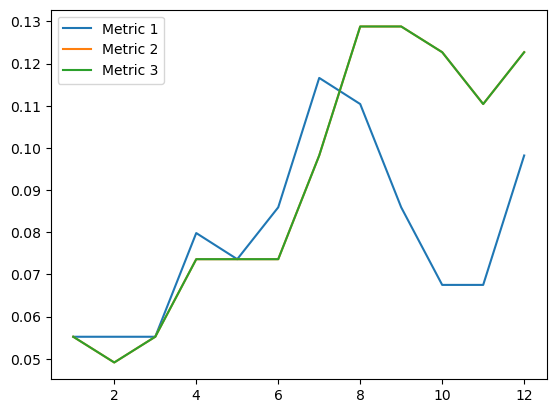

In [31]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [16]:
rec_eucl_vgg16_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16_pca, n=4)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg16_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0736  Average Recall: 0.0429  Average F1-score: 0.0532
k=2:  Average Precision: 0.0706  Average Recall: 0.0767  Average F1-score: 0.0718
k=3:  Average Precision: 0.0818  Average Recall: 0.1319  Average F1-score: 0.0988
k=4:  Average Precision: 0.0798  Average Recall: 0.1718  Average F1-score: 0.1070
k=5:  Average Precision: 0.0834  Average Recall: 0.2260  Average F1-score: 0.1200
k=6:  Average Precision: 0.0798  Average Recall: 0.2597  Average F1-score: 0.1204
k=7:  Average Precision: 0.0806  Average Recall: 0.3078  Average F1-score: 0.1262
k=8:  Average Precision: 0.0821  Average Recall: 0.3569  Average F1-score: 0.1318
k=9:  Average Precision: 0.0825  Average Recall: 0.3967  Average F1-score: 0.1351
k=10:  Average Precision: 0.0804  Average Recall: 0.4315  Average F1-score: 0.1341


## PCA vgg19

Number of components explaining 95% variance: 273


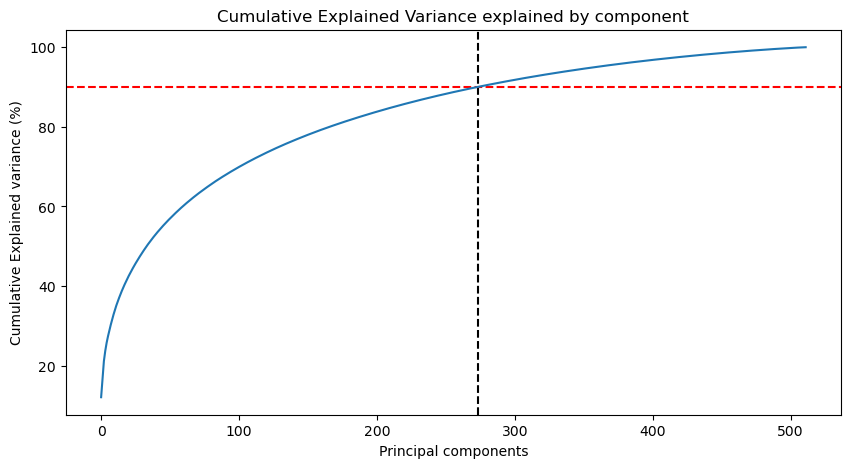

In [32]:
pca = PCA()
pca.fit(embedding_matrix_vgg19)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_vgg19 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_vgg19))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_vgg19, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [33]:
pca_vgg19 = PCA(n_components=pcs_90_vgg19)
embedding_matrix_pca_vgg19 = pca_vgg19.fit_transform(embedding_matrix_vgg19)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_vgg19_pca = pd.DataFrame({
    'id': df_embeddings_vgg19_1['id'],
    'embedding': embedding_matrix_pca_vgg19.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_vgg19_pca.head())

    id                                          embedding
0  492  [-255.86372936476886, 59.898559764152424, -42....
1  496  [-214.14050963028004, 94.98221528810896, -39.2...
2    1  [190.83586170101665, 241.70941839468765, -164....
3    2  [53.25222088893828, 173.44059702562078, -52.87...
4    3  [-1.2292666558188852, 114.6021592058633, -44.5...


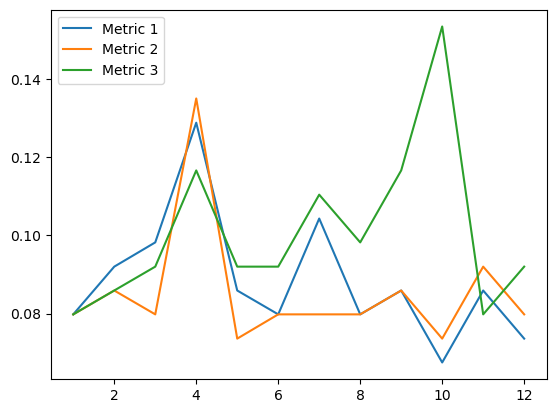

In [34]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

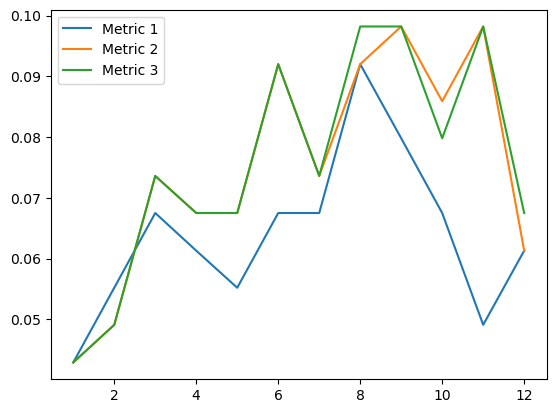

In [35]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg19_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

## PCA ResNet50

Number of components explaining 95% variance: 632


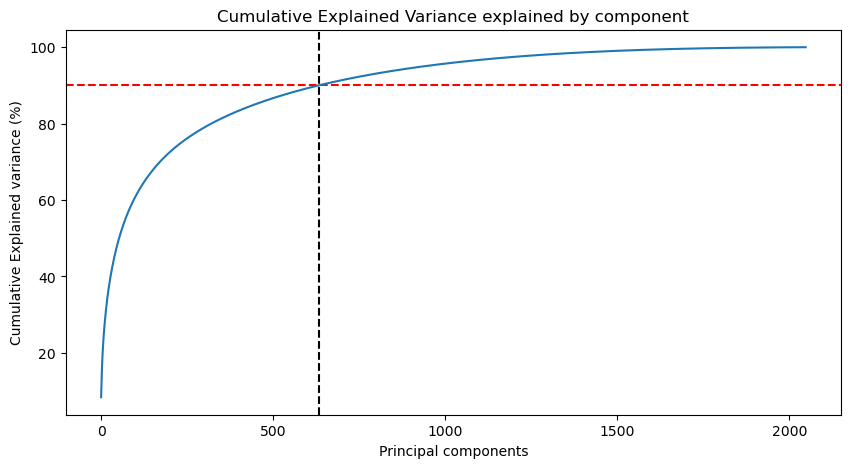

In [36]:
pca = PCA()
pca.fit(embedding_matrix_resnet50)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet50 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet50))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet50, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [37]:
pca_resnet50 = PCA(n_components=pcs_90_resnet50)
embedding_matrix_pca_resnet50 = pca_resnet50.fit_transform(embedding_matrix_resnet50)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet50_pca = pd.DataFrame({
    'id': df_embeddings_resnet50_1['id'],
    'embedding': embedding_matrix_pca_resnet50.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet50_pca.head())

    id                                          embedding
0  492  [-97.57664706999199, 0.7212001174452817, 23.84...
1  496  [-95.61248032777523, 7.617688877762152, 17.834...
2    1  [-26.388475431975372, 1.460510502140481, 71.51...
3    2  [-14.482415982468106, 19.239587514406526, 73.6...
4    3  [-49.55825600812563, 25.077221289421345, 26.43...


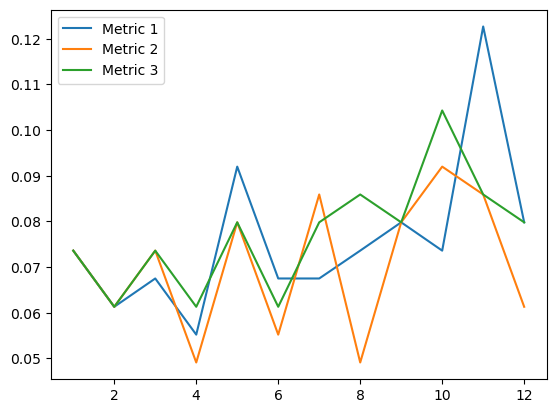

In [38]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

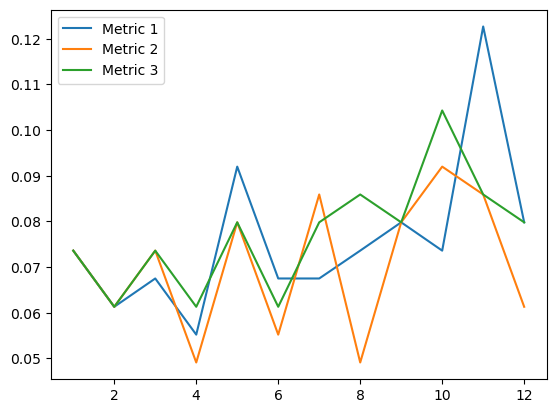

In [39]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_pca ,n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

## PCA ResNet101

Number of components explaining 95% variance: 618


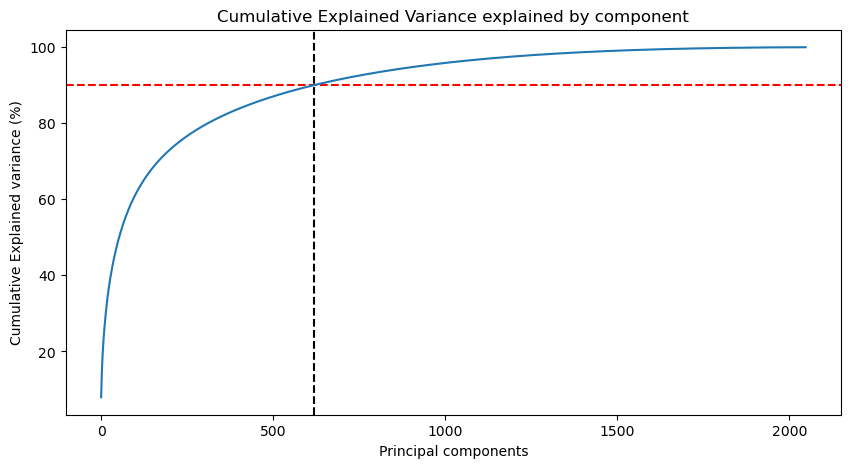

In [40]:
pca = PCA()
pca.fit(embedding_matrix_resnet101)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet101 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet101))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet101, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [41]:
pca_resnet101 = PCA(n_components=pcs_90_resnet101)
embedding_matrix_pca_resnet101 = pca_resnet101.fit_transform(embedding_matrix_resnet101)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet101_pca = pd.DataFrame({
    'id': df_embeddings_resnet101_1['id'],
    'embedding': embedding_matrix_pca_resnet101.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet101_pca.head())

    id                                          embedding
0  492  [-92.23938489266354, 1.1547169466090363, 22.64...
1  496  [-95.0060628393673, 11.197081593227221, 22.718...
2    1  [-22.44744076928549, -13.053030900278443, 92.2...
3    2  [22.129170237102798, -0.6674076658862835, 122....
4    3  [-51.901368701977965, -35.84579289414737, 43.2...


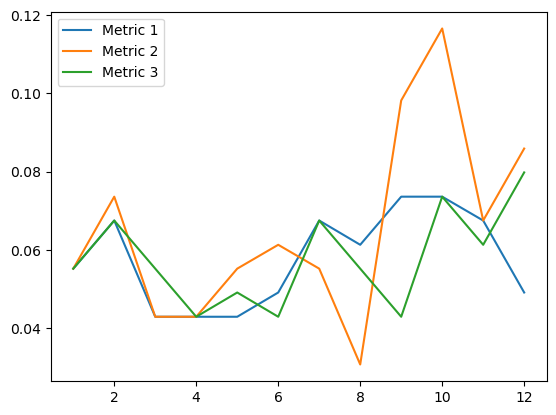

In [42]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

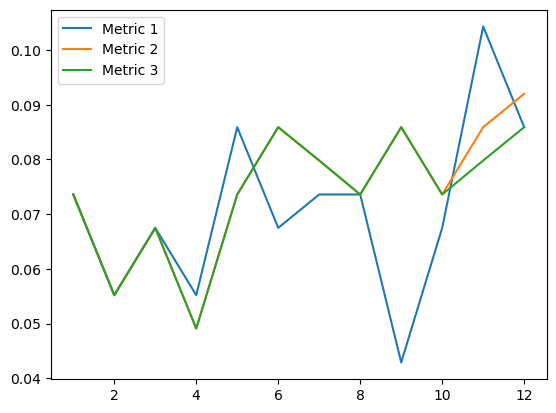

In [43]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

## PCA ResNet152

Number of components explaining 95% variance: 616


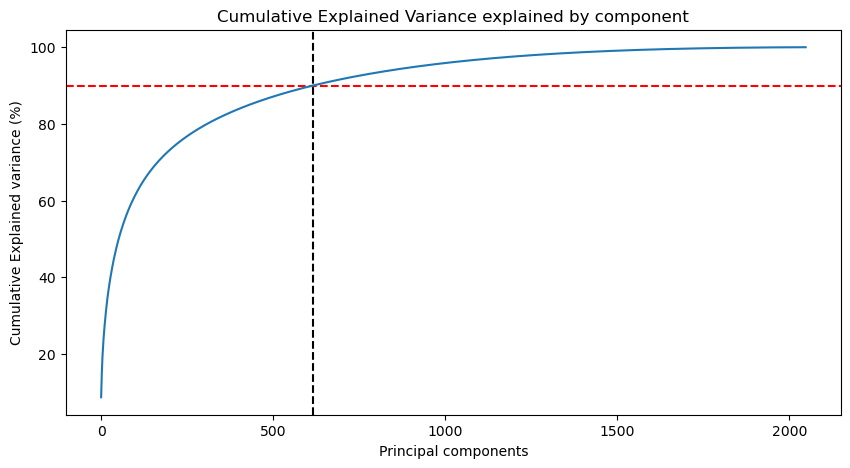

In [44]:
pca = PCA()
pca.fit(embedding_matrix_resnet152)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet152 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet152))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet152, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [45]:
pca_resnet152 = PCA(n_components=pcs_90_resnet152)
embedding_matrix_pca_resnet152 = pca_resnet152.fit_transform(embedding_matrix_resnet152)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet152_pca = pd.DataFrame({
    'id': df_embeddings_resnet152_1['id'],
    'embedding': embedding_matrix_pca_resnet152.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet152_pca.head())

    id                                          embedding
0  492  [-89.22814832570931, -4.8184212884963635, 22.1...
1  496  [-92.58056785625459, 4.82747415180067, 70.9675...
2    1  [-34.820310353625246, -12.783879565722936, -18...
3    2  [-9.020730185296419, -10.798701440913634, 15.2...
4    3  [-70.21395084165671, -55.37980626203419, -27.9...


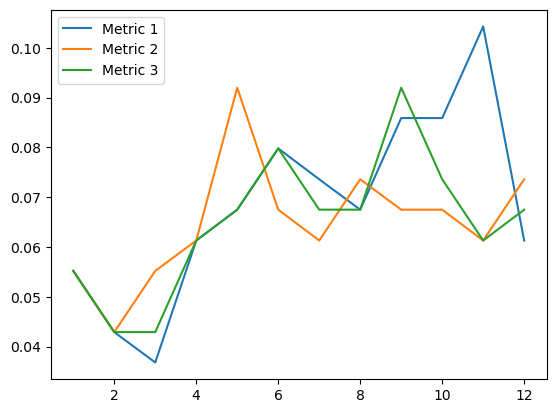

In [46]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

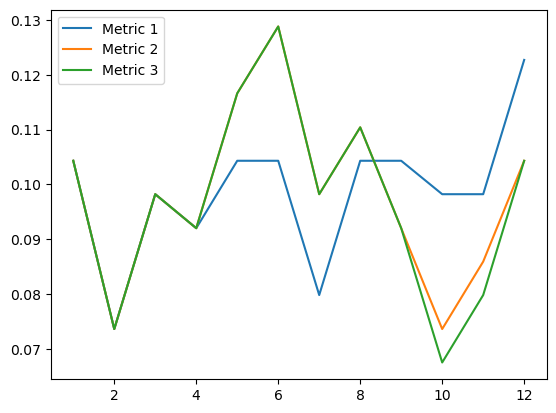

In [47]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

## PCA InceptionV3

Number of components explaining 95% variance: 569


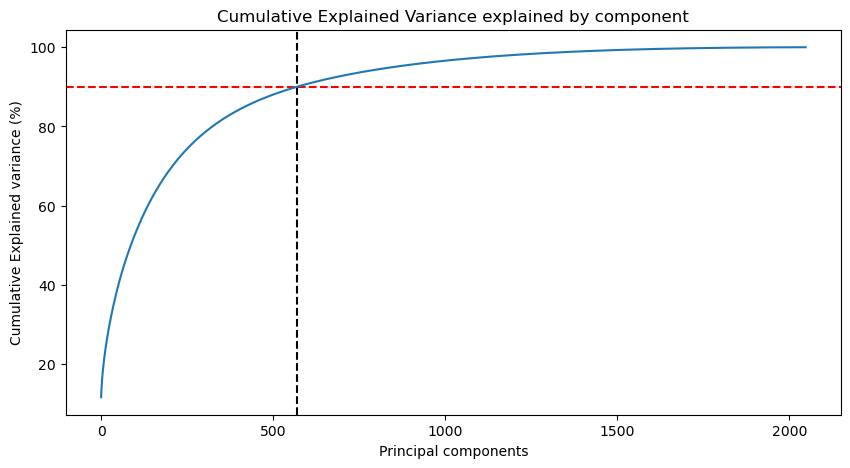

In [48]:
pca = PCA()
pca.fit(embedding_matrix_inceptionv3)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_inceptionv3 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_inceptionv3))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_inceptionv3, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [49]:
pca_inceptionv3 = PCA(n_components=pcs_90_inceptionv3)
embedding_matrix_pca_inceptionv3 = pca_inceptionv3.fit_transform(embedding_matrix_inceptionv3)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_inceptionv3_pca = pd.DataFrame({
    'id': df_embeddings_inceptionv3_1['id'],
    'embedding': embedding_matrix_pca_inceptionv3.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_inceptionv3_pca.head())

    id                                          embedding
0  492  [-40.66933429751808, 9.408870952102077, 0.3587...
1  496  [-14.150463782734866, 12.275287333355019, -4.5...
2    1  [-10.828993533014279, 5.083012614822803, 3.454...
3    2  [-9.27607294286244, -12.403176331421525, 0.515...
4    3  [-28.5691183514911, -6.784322738033927, 4.3045...


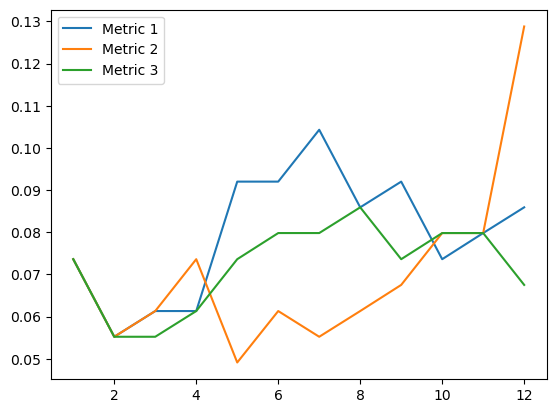

In [50]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

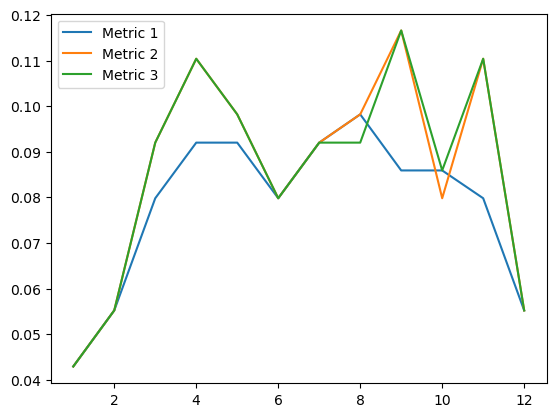

In [51]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_inceptionv3_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

## PCA Xcpetion

Number of components explaining 95% variance: 581


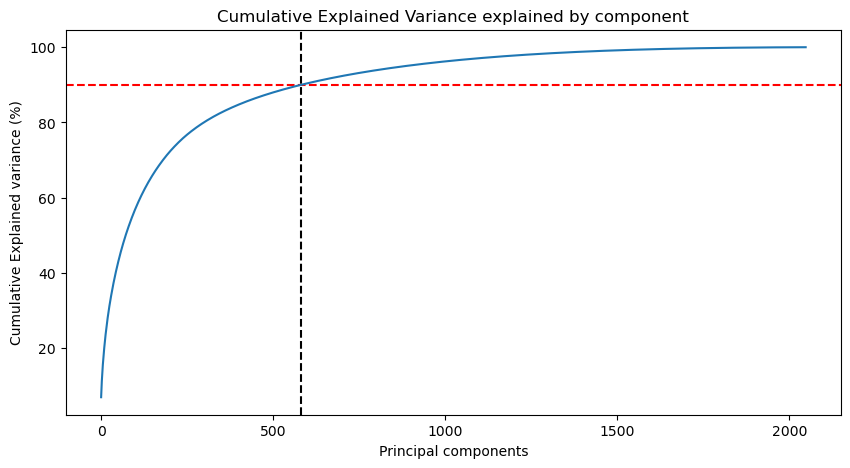

In [52]:
pca = PCA()
pca.fit(embedding_matrix_xception)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_xception = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_xception))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_xception, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [53]:
pca_xception = PCA(n_components=pcs_90_xception)
embedding_matrix_pca_xception = pca_xception.fit_transform(embedding_matrix_xception)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_xception_pca = pd.DataFrame({
    'id': df_embeddings_xception_1['id'],
    'embedding': embedding_matrix_pca_xception.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_xception_pca.head())

    id                                          embedding
0  492  [-16.77181613416099, 9.251034225653717, 0.2857...
1  496  [-9.261021459819553, 1.283432723444225, 4.0583...
2    1  [-5.772218551078392, -3.2222955288328623, -0.6...
3    2  [-11.804225908850954, -7.372868841926152, -0.4...
4    3  [-15.39967627904465, -8.673341420532852, 0.065...


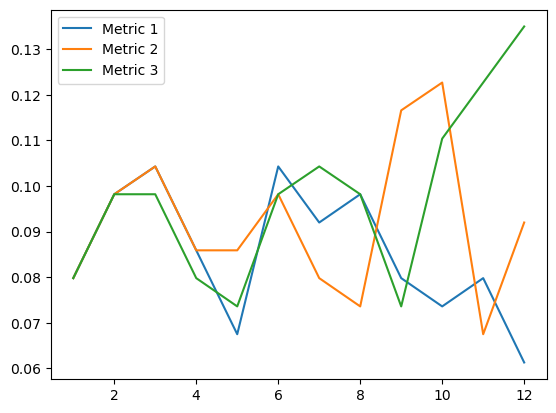

In [54]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

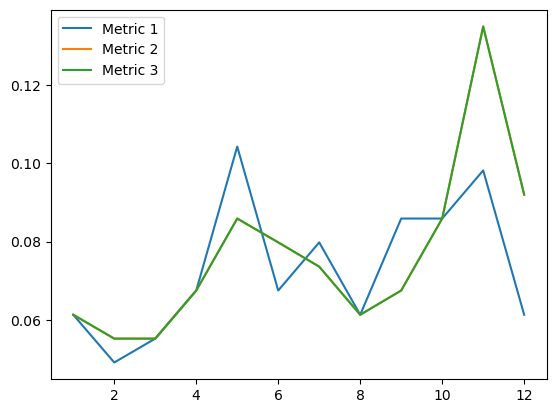

In [55]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_xception_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()